In [1]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss

In [125]:
import pandas as pd
games = pd.read_csv('../data/games.csv')
games = games[games['Date'] == '2024-12-10']
games['Time'] = pd.to_datetime(games['Time'])
games['Date'] = pd.to_datetime(games['Date'])

In [126]:
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo
today = datetime.now(ZoneInfo('America/New_York'))

In [127]:
datetime.now(ZoneInfo('America/New_York')).replace(tzinfo = None)

datetime.datetime(2024, 12, 10, 0, 59, 55, 582333)

In [128]:
today_dt = today.replace(hour = 0, minute = 0, second = 0, microsecond = 0, tzinfo = None)


time_bins = [today_dt + timedelta(hours = int(hr)) for hr in np.arange(10, 30, 3)]
games['left_cut'] = pd.cut(pd.to_datetime(games['Time']), time_bins, labels = time_bins[:-1], right = False)

In [129]:
pd.to_datetime(games['left_cut'])

137   2024-12-10 19:00:00
138   2024-12-10 19:00:00
139   2024-12-10 19:00:00
140   2024-12-10 19:00:00
141   2024-12-10 19:00:00
142   2024-12-10 19:00:00
143   2024-12-10 19:00:00
144   2024-12-10 19:00:00
145   2024-12-10 19:00:00
146   2024-12-10 19:00:00
147   2024-12-10 19:00:00
148   2024-12-10 19:00:00
Name: left_cut, dtype: datetime64[ns]

In [130]:
today_dt = today.replace(hour = 0, minute = 0, second = 0, microsecond = 0, tzinfo = None)
time_bins = [today_dt + timedelta(hours = int(hr)) for hr in np.arange(10, 30, 3)]

games['left_dt'] = pd.cut(pd.to_datetime(games['Time']), time_bins, labels = time_bins[:-1], right = False)

left_dt_et = pd.to_datetime(games['left_dt'].sort_values().unique())
left_hr_et = [t.hour for t in left_dt_et]
execute_crons = [datetime_to_cron_utc(t) for t in left_dt_et - timedelta(hours = 1)]

In [134]:
left_hr_et

[19]

In [118]:
execute_et = pd.to_datetime(games['left_cut'].sort_values().unique()) - timedelta(hours = 1)

In [139]:
games

,game_id,Date,Time,Home,Away,event_id,insert_timestamp_utc
0,202411210CHO,2024-11-21,2024-11-21 19:00:00,CHO,DET,NaN,2024-11-22 00:12:27.519088+00:00
1,202411210TOR,2024-11-21,2024-11-21 19:30:00,TOR,MIN,NaN,2024-11-22 00:12:27.519088+00:00
2,202411210SAS,2024-11-21,2024-11-21 20:00:00,SAS,UTA,NaN,2024-11-22 00:12:27.519088+00:00
3,202411210LAL,2024-11-21,2024-11-21 22:30:00,LAL,ORL,NaN,2024-11-22 00:12:27.519088+00:00
4,202411210CHO,2024-11-21,2024-11-21 19:00:00,CHO,DET,NaN,2024-11-22 00:17:21.899093+00:00
...,...,...,...,...,...,...,...
144,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:50:31.155717+00:00
145,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:50:51.104447+00:00
146,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:50:51.104447+00:00
147,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:52:05.243036+00:00


In [141]:
datetime.today()

datetime.datetime(2024, 12, 10, 1, 3, 23, 890394)

In [147]:
games = pd.read_csv('../data/games.csv')
start_time = 19

now = datetime.today()
today_dt = now.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
print(now.strftime('%H:%M:%S'))
games[(games['Time'] >= now.strftime(f'%Y-%m-%d')  + f' {start_time}:00:00') & (games['Time'] < now.strftime(f'%Y-%m-%d')  + f' {start_time+3}:00:00')]

01:05:59


,game_id,Date,Time,Home,Away,event_id,insert_timestamp_utc
137,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:36:09.888850+00:00
138,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:36:09.888850+00:00
139,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:36:20.465210+00:00
140,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:36:20.465210+00:00
141,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:37:01.062903+00:00
142,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:37:01.062903+00:00
143,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:50:31.155717+00:00
144,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:50:31.155717+00:00
145,202412100MIL,2024-12-10,2024-12-10 19:00:00,MIL,ORL,7e2048eb3f47487e576dae3b41d296bf,2024-12-10 05:50:51.104447+00:00
146,202412100OKC,2024-12-10,2024-12-10 21:30:00,OKC,DAL,9267739cadf69b4bab8e7b7815d8b5e7,2024-12-10 05:50:51.104447+00:00


In [103]:
def datetime_to_cron_utc(t) :
    t_et = pd.to_datetime(t).replace(tzinfo = pytz.timezone('US/Eastern'))
    t_utc = t_et.astimezone(pytz.utc)
    return f"{t_utc.minute} {t_utc.hour} {t_utc.day} {t_utc.month} *"

In [51]:
time_bins = [today.replace(hour = hr, minute = 0, second = 0, microsecond = 0, tzinfo = None) for hr in np.arange(10, 24, 3)]

In [2]:
import pandas as pd

In [3]:
# Load data
years = [2019, 2020, 2021, 2022, 2023, 2024]
cols = ['game_id', 'Date', 'season', 'Home', 'Away', 'jumpball_home', 'jumpball_away', 'jumpball_possession_tm']
first_basket = pd.concat([pd.read_csv(f'../data/first_basket_{year}.csv') for year in years])

In [50]:
import os

[f for f in os.listdir('../data') if f.startswith('first_basket')]

['first_basket_2023.csv',
 'first_basket_2022.csv',
 'first_basket_2020.csv',
 'first_basket_2021.csv',
 'first_basket_2025.csv',
 'first_basket_2019.csv',
 'first_basket_2024.csv']

In [ ]:
os.listdir('../data/rosters.nosync/')

dfs = []
for path in os.listdir('../data/rosters.nosync/') :
    df = pd.read_csv(os.path.join(path))
    # df.insert(1, 'Year', year)
    dfs.append(df)
stats = pd.concat(dfs).reset_index(drop = True)
stats = pd.merge(stats, first_basket[['game_id', 'first_basket']], on = 'game_id', how = 'inner')
stats['first_basket_scorer'] = (stats['player_id'] == stats['first_basket']).astype(int)

FileNotFoundError: [Errno 2] No such file or directory: 'rosters_2015.csv'

In [4]:
dfs = []
for year in years :
    df = pd.read_csv(f'../data/rosters.nosync/rosters_{year}.csv')
    df.insert(1, 'Year', year)
    dfs.append(df)
stats = pd.concat(dfs).reset_index(drop = True)
stats = pd.merge(stats, first_basket[['game_id', 'first_basket']], on = 'game_id', how = 'inner')
stats['first_basket_scorer'] = (stats['player_id'] == stats['first_basket']).astype(int)

In [34]:
features = []
for f in ['PTS', 'USG%', 'VORP', 'FGA'] :

    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}'].expanding().mean().reset_index(level = 0, drop = True)
    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}_avg'].shift()
    features.append(f'{f}_avg')

    for w in [25, 50] :
        stats[f'{f}_{w}'] = stats.groupby('player_id')[f'{f}'].rolling(w, min_periods = 1).mean().reset_index(level = 0, drop = True)
        stats[f'{f}_{w}'] = stats.groupby('player_id')[f'{f}_{w}'].shift()
        features.append(f'{f}_{w}')

In [35]:
starters = stats.copy()[stats['starter']]

In [36]:
starters['first_basket_avg'] = starters.groupby('player_id')['first_basket_scorer'].expanding().mean().reset_index(level = 0, drop = True)
starters['first_basket_avg'] = starters.groupby('player_id')['first_basket_avg'].shift()
features.append(f'first_basket_avg')

for w in [25, 50] :
    starters[f'first_basket_{w}'] = starters.groupby('player_id')['first_basket_scorer'].rolling(w, min_periods = 1).mean().reset_index(level = 0, drop = True)
    starters[f'first_basket_{w}'] = starters.groupby('player_id')[f'first_basket_{w}'].shift()
    features.append(f'first_basket_{w}')

In [37]:
ratings = pd.read_csv('../data/2k-ratings-2001-2024.csv')
# ratings['Rating'] = (
#     (ratings['Rating'] - ratings.groupby('Year')['Rating'].transform('mean'))
#     / ratings.groupby('Year')['Rating'].transform('std')
# )

In [38]:
starters = starters.merge(
    ratings[['player_id', 'Year', 'Rating']],
    on = ['player_id', 'Year'],
    how = 'left'
)
features.append('Rating')

In [39]:
starters

,game_id,Year,Player,player_id,Team,MP,FG,FGA,FG%,3P,...,VORP_avg,VORP_25,VORP_50,FGA_avg,FGA_25,FGA_50,first_basket_avg,first_basket_25,first_basket_50,Rating
0,201810160BOS,2019,Jaylen Brown,brownja02,BOS,28.383333,5,13,0.385,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0
1,201810160BOS,2019,Kyrie Irving,irvinky01,BOS,29.000000,2,14,0.143,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
2,201810160BOS,2019,Jayson Tatum,tatumja01,BOS,28.933333,9,17,0.529,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
3,201810160BOS,2019,Gordon Hayward,haywago01,BOS,24.616667,4,12,0.333,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0
4,201810160BOS,2019,Al Horford,horfoal01,BOS,29.950000,4,7,0.571,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70585,202404140SAS,2024,Jaden Ivey,iveyja01,DET,27.066667,5,13,0.385,1,...,-0.725333,-1.216,-0.724,12.953333,14.16,14.20,0.105263,0.080000,0.080000,80.0
70586,202404140SAS,2024,Troy Brown Jr.,browntr01,DET,11.166667,0,3,0.000,0,...,0.082535,-1.180,-0.152,5.481690,4.40,4.20,0.040816,0.120000,0.060000,73.0
70587,202404140SAS,2024,Blake Wesley,weslebl01,SAS,30.283333,7,9,0.778,1,...,-1.518557,-1.000,-0.890,4.340206,3.68,3.80,0.000000,0.000000,0.000000,73.0
70588,202404140SAS,2024,Chimezie Metu,metuch01,DET,33.433333,4,9,0.444,1,...,0.128185,0.520,0.402,4.563707,5.24,4.70,0.081081,0.040000,0.081081,75.0


In [44]:
data = starters[['game_id', 'player_id', 'first_basket_scorer'] + features].dropna().reset_index(drop = True)
# features_norm = features#[f for f in features if 'first_basket' not in f and f != 'Rating']
# Normalize per game
data[features] = (
    (
        data[features] - data.groupby('game_id')[features].transform('mean')
    )
    / (data.groupby('game_id')[features].transform('std') + 1e-6)
)

In [97]:
import pandas as pd
import os

feature_stats = ['PTS', 'USG%', 'VORP', 'FGA']
windows = [5, 25, 50]


# Load label dtaa
first_basket_dir = '../data'
first_basket = pd.concat([pd.read_csv(os.path.join(first_basket_dir, file)) for file in os.listdir(first_basket_dir) if file.startswith('first_basket')])
first_basket = first_basket.sort_values('Date').reset_index(drop = True)

# Load feature data
roster_dir = '../data/rosters.nosync'
dfs = []
for file in os.listdir(roster_dir) :
    df = pd.read_csv(os.path.join(roster_dir, file))
    year = int(file.split('_')[-1][:4])
    df.insert(1, 'Year', year)
    dfs.append(df)
stats = pd.concat(dfs).sort_values('game_id').reset_index(drop = True)

# Load rating data
ratings = pd.read_csv('../data/2k-ratings-2001-2024.csv')[['Year', 'player_id', 'rating']]
ratings_25 = pd.read_csv('../data/player_metadata.csv')[['player_id', 'rating']]
ratings_25['Year'] = 2025
ratings = pd.concat([ratings, ratings_25]).reset_index(drop = True)


features = []

for f in feature_stats :

    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}'].expanding().mean().reset_index(level = 0, drop = True)
    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}_avg'].shift()
    features.append(f'{f}_avg')

    for w in windows :
        stats[f'{f}_{w}'] = stats.groupby('player_id')[f'{f}'].rolling(w, min_periods = 1).mean().reset_index(level = 0, drop = True)
        stats[f'{f}_{w}'] = stats.groupby('player_id')[f'{f}_{w}'].shift()
        features.append(f'{f}_{w}')


# Merge
stats = pd.merge(stats, first_basket[['game_id', 'first_basket']], on = 'game_id', how = 'left')
stats['first_basket_scorer'] = stats.apply(lambda row :
    int(row['first_basket'] == row['player_id'])
    if not pd.isna(row['first_basket'])
    else np.nan,
    axis = 1
)

stats['first_basket_avg'] = stats.groupby('player_id')['first_basket_scorer'].expanding().mean().reset_index(level = 0, drop = True)
stats['first_basket_avg'] = stats.groupby('player_id')['first_basket_avg'].shift()
features.append('first_basket_avg')

for w in windows :
    stats[f'first_basket_{w}'] = stats.groupby('player_id')['first_basket_scorer'].rolling(w, min_periods = 1).mean().reset_index(level = 0, drop = True)
    stats[f'first_basket_{w}'] = stats.groupby('player_id')[f'first_basket_{w}'].shift()
    features.append(f'first_basket_{w}')

stats = stats.merge(
    ratings,
    on = ['player_id', 'Year'],
    how = 'left'
)
features.append('rating')

starters = stats.copy()[stats['starter']]
data = starters[['game_id', 'Player', 'player_id', 'first_basket_scorer'] + features].reset_index(drop = True)

# Normalize per game
eps = 1e-6
data[features] = (
    (
        data[features] - data.groupby('game_id')[features].transform('mean')
    )
    / (data.groupby('game_id')[features].transform('std') + eps)
)

In [102]:
data_ = data.dropna()
X = data_[features].to_numpy()
y = data_['first_basket_scorer'].to_numpy()

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [2, 3, 4],
    'max_features': [2, 3, 4]
}

# Set up GridSearchCV with log loss as the scoring metric
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = 'neg_log_loss',  # Use negative log loss
    cv = 5,  # 5-fold cross-validation
    verbose = 2,
    n_jobs = -1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the model on the test set
probs = best_model.predict_proba(X_test)
test_log_loss = log_loss(y_test, probs)

print("Test Set Log Loss:", test_log_loss)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ......max_depth=2, max_features=2, n_estimators=300; total time=   5.8s
[CV] END ......max_depth=2, max_features=2, n_estimators=300; total time=   5.9s
[CV] END ......max_depth=2, max_features=2, n_estimators=300; total time=   6.0s
[CV] END ......max_depth=2, max_features=2, n_estimators=300; total time=   6.0s
[CV] END ......max_depth=2, max_features=2, n_estimators=300; total time=   6.1s
[CV] END ......max_depth=2, max_features=2, n_estimators=400; total time=   7.8s
[CV] END ......max_depth=2, max_features=2, n_estimators=400; total time=   7.9s
[CV] END ......max_depth=2, max_features=2, n_estimators=400; total time=   8.0s
[CV] END ......max_depth=2, max_features=2, n_estimators=400; total time=   8.0s
[CV] END ......max_depth=2, max_features=2, n_estimators=400; total time=   8.0s
[CV] END ......max_depth=2, max_features=2, n_estimators=500; total time=  10.0s
[CV] END ......max_depth=2, max_features=2, n_e

In [109]:
import pickle

# Save the best model to a .pkl file
with open('../models/model_rf.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [111]:
# Load the model from the .pkl file
with open('../models/model_rf.pkl', "rb") as f:
    loaded_model = pickle.load(f)

In [118]:
1 / loaded_model.predict_proba(X_train)[:, 1].mean()

np.float64(9.998147618995512)

In [ ]:

in_2024 = data['game_id'].apply(lambda x: x[:4] == '2023')
train = data.copy()[~in_2024]
test = data.copy()[in_2024]

X_train = train[features].to_numpy()
X_test = test[features].to_numpy()

y_train = train['first_basket_scorer'].to_numpy()
y_test = test['first_basket_scorer'].to_numpy()

In [254]:
def evaluate(model, X_train, y_train, X_test, y_test, train, test) :

    # Test
    y_pred = model.predict_proba(X_test)[:, -1]
    loss_baseline = log_loss(y_test, 0.1 * np.ones_like(y_test))
    loss = log_loss(y_test, y_pred)
    loss_test = 100 * (loss - loss_baseline) / loss_baseline
    test['pred'] = y_pred
    test['argmax'] = (test.groupby('game_id')['pred'].transform('max') == test['pred']).astype(int)
    test['correct'] = (test['first_basket_scorer'] == test['argmax']).astype(int)
    acc_test = (test.groupby('game_id')['correct'].mean() == 1).mean()

    # Train
    y_pred = model.predict_proba(X_train)[:, -1]
    loss_baseline = log_loss(y_train, 0.1 * np.ones_like(y_train))
    loss = log_loss(y_train, y_pred)
    loss_train = 100 * (loss - loss_baseline) / loss_baseline
    train['pred'] = y_pred
    train['argmax'] = (train.groupby('game_id')['pred'].transform('max') == train['pred']).astype(int)
    train['correct'] = (train['first_basket_scorer'] == train['argmax']).astype(int)
    acc_train = (train.groupby('game_id')['correct'].mean() == 1).mean()

    return loss_test, acc_test, loss_train, acc_train

In [264]:
test

,game_id,player_id,first_basket_scorer,PTS_avg,PTS_25,PTS_50,USG%_avg,USG%_25,USG%_50,VORP_avg,VORP_25,VORP_50,FGA_avg,FGA_25,FGA_50,first_basket_avg,first_basket_25,first_basket_50,Rating
50768,202301010DEN,brownja02,0,1.019728,1.261514,1.089535,1.154631,1.404714,1.321383,-0.265292,-0.008006,-0.197989,1.161726,1.517045,1.435030,0.133333,0.00,0.12,1.931067
50769,202301010DEN,caldwke01,0,-0.733749,-0.697785,-0.583533,-0.894915,-0.839785,-0.680068,-0.821390,-1.009388,-0.914813,-0.762892,-0.682855,-0.578415,0.070485,0.04,0.10,0.128142
50770,202301010DEN,tatumja01,0,1.540131,1.708371,1.683780,1.414165,1.563391,1.505586,0.543576,0.741390,1.067634,1.711447,1.797569,1.667197,0.090909,0.20,0.18,2.914481
50771,202301010DEN,gordoaa01,0,-0.046388,0.043704,-0.124460,-0.075672,-0.122987,-0.130961,-0.460847,0.078614,-0.474625,0.004432,-0.343273,-0.302217,0.118644,0.08,0.08,0.619849
50772,202301010DEN,smartma01,0,-0.664530,-0.687964,-0.713604,-0.744058,-0.622043,-0.525758,-0.401468,-0.341362,-0.550013,-0.565861,-0.557357,-0.526378,0.076613,0.00,0.06,1.111556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62352,202312310WAS,youngtr01,0,2.059498,2.166122,1.941661,2.047084,1.580722,1.611911,1.872218,1.998159,1.988046,1.722784,1.675259,1.480416,0.094241,0.00,0.06,2.140643
62353,202312310WAS,johnsja05,0,-1.228351,-0.636936,-1.098626,-0.801660,-0.415123,-0.617182,-0.478161,0.460368,0.284604,-1.244231,-0.756834,-1.089239,0.250000,0.25,0.25,-0.032648
62354,202312310WAS,capelca01,0,0.000935,-0.650445,-0.579887,-0.617233,-0.732332,-0.857938,1.032318,0.295535,0.672448,-0.245324,-0.822790,-0.790537,0.104478,0.04,0.06,1.053998
62355,202312310WAS,beysa01,0,0.083244,-0.481586,-0.456215,-0.179577,-0.835565,-0.671064,-0.335752,-0.559655,-0.295765,0.180675,-0.352860,-0.344530,0.047120,0.04,0.02,0.433057


In [284]:
X_train.shape

(58229, 16)

In [278]:
model = RandomForestClassifier(
    max_depth = 3,
    max_features = 3,
    n_estimators = 400
)

model.fit(X_train, y_train)

evaluate(model, X_train, y_train, X_test, y_test, train.copy(), test.copy())

(-1.2654306705371612,
 np.float64(0.15893470790378006),
 -1.395675520799341,
 np.float64(0.16476789661622174))

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_train)

# Summary plot of SHAP va

/opt/anaconda3/envs/penv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 116134/116458 [05:02<00:00]        

AttributeError: 'DataFrame' object has no attribute 'feature_names'

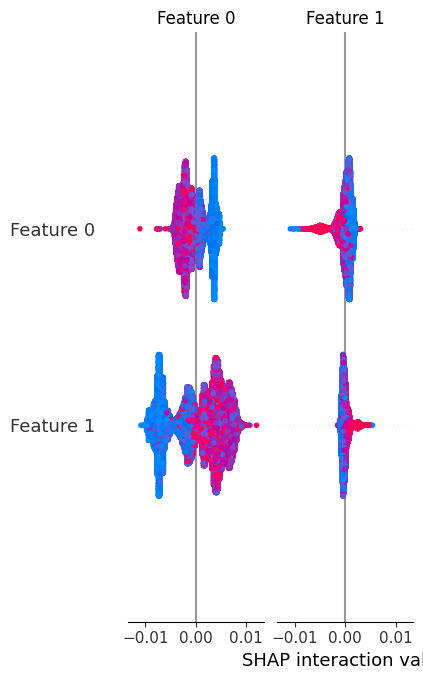

In [282]:
shap.summary_plot(shap_values, X_train)

In [285]:
shap.plots.force(shap_values[0])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [259]:
model = LogisticRegression()
model.fit(X_train, y_train)
evaluate(model, X_train, y_train, X_test, y_test, train.copy(), test.copy())

(-1.0409602591023905,
 np.float64(0.15066666666666667),
 -1.138427661808673,
 np.float64(0.15091342335186655))

In [277]:
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 1000)
model.fit(X_train, y_train)
evaluate(model, X_train, y_train, X_test, y_test, train.copy(), test.copy())

(-1.306895930374387,
 np.float64(0.15893470790378006),
 -1.0993038956073535,
 np.float64(0.15014453324264582))

In [216]:
from sklearn.decomposition import PCA

In [219]:
model = LogisticRegression()
pca = PCA(n_components = 5)
pcs = pca.fit_transform(X_train)
model.fit(pcs, y_train)
evaluate(model, pca.transform(X_test), y_test)

-0.9007088849159999

In [141]:
model.fit(pcs, y_train)

/opt/anaconda3/envs/penv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.013006147436874461, penalty='l1', solver='liblinear')

In [142]:
model.coef_

array([[0.07205394, 0.02603759]])

In [143]:
y_pred = model.predict_proba(pca.transform(X_test))[:, -1]

In [144]:
log_loss(y_test, y_pred) - log_loss(y_test, len(y_test) * [0.1])

-0.0026404069410321807

In [145]:
test['y_pred'] = y_pred

In [146]:
test.sort_values('y_pred', ascending = False)

,game_id,player_id,first_basket_scorer,PTS_avg,PTS_25,PTS_50,USG%_avg,USG%_25,USG%_50,VORP_avg,VORP_25,VORP_50,FGA_avg,FGA_25,FGA_50,first_basket_avg,first_basket_25,first_basket_50,y_pred
69348,202404090PHI,embiijo01,0,2.262617,2.424091,2.367581,2.274667,2.217474,2.291331,2.603081,2.699874,2.745917,1.905663,1.974658,1.978467,0.249258,0.40,0.280000,0.169184
68781,202404020PHI,embiijo01,0,2.210108,2.464780,2.469483,2.398856,2.270532,2.452733,2.315665,2.610013,2.608444,1.803999,2.060674,2.115291,0.251497,0.40,0.280000,0.168364
69313,202404090MEM,wembavi01,0,2.415832,2.187874,2.448943,2.335628,1.936079,2.269823,2.207069,2.489463,2.393843,2.409856,2.127616,2.443934,0.217391,0.32,0.240000,0.167289
63286,202401130DAL,irvinky01,0,2.307803,2.205828,2.358785,2.004522,1.878044,1.995839,2.558945,2.547740,2.510361,2.268607,2.141940,2.260537,0.162055,0.28,0.140000,0.166666
68818,202404020WAS,antetgi01,0,2.269727,2.136975,2.384523,2.132734,1.993625,2.103022,2.657622,2.706557,2.734604,1.879324,1.605499,1.913319,0.174684,0.24,0.220000,0.166173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63962,202401230BRK,simsje01,0,-1.872283,-1.727886,-1.737376,-1.834889,-1.862485,-1.878536,-1.942436,-1.129638,-1.262001,-1.916913,-1.875397,-1.825793,0.000000,0.00,0.000000,0.066759
68678,202404010CHI,krejcvi01,0,-1.676529,-1.903480,-1.941171,-1.621423,-1.879858,-1.890135,-1.421309,-1.421539,-1.886777,-1.633112,-1.905871,-1.853333,0.000000,0.00,0.000000,0.066172
67061,202403100ATL,krejcvi01,0,-1.958374,-2.116185,-1.995591,-1.700793,-1.670654,-1.621971,-1.999408,-1.238079,-1.701228,-1.910293,-1.996344,-1.843386,0.000000,0.00,0.000000,0.065106
68414,202403280ATL,krejcvi01,0,-2.088776,-1.894712,-1.925592,-1.934995,-1.808547,-1.742394,-1.743468,-1.418082,-1.594648,-2.059752,-1.876977,-1.870955,0.000000,0.00,0.000000,0.065098


In [101]:
train['pred_ML'] = (train.groupby('game_id')['y_pred'].transform('max') == train['y_pred']).astype(int)
((train['first_basket_scorer'] == 1 ) & (train['pred_ML'] == 1)).sum() / train['game_id'].unique().shape[0]

np.float64(0.14805401111993646)

In [102]:
train['pred_PTS'] = (train.groupby('game_id')['PTS_avg'].transform('max') == train['PTS_avg']).astype(int)
((train['first_basket_scorer'] == 1 ) & (train['pred_PTS'] == 1)).sum() / train['game_id'].unique().shape[0]

np.float64(0.13200953137410643)

In [103]:
train['pred_USG'] = (train.groupby('game_id')['USG%_avg'].transform('max') == train['USG%_avg']).astype(int)
((train['first_basket_scorer'] == 1 ) & (train['pred_USG'] == 1)).sum() / train['game_id'].unique().shape[0]

np.float64(0.12883240667196189)

In [104]:
test['y_pred'] = model.predict_proba(X_test)[:, -1]

In [105]:
test['pred_ML'] = (test.groupby('game_id')['y_pred'].transform('max') == test['y_pred']).astype(int)
((test['first_basket_scorer'] == 1 ) & (test['pred_ML'] == 1)).sum() / test['game_id'].unique().shape[0]

np.float64(0.16266666666666665)

In [106]:
test['pred_PTS'] = (test.groupby('game_id')['PTS_avg'].transform('max') == test['PTS_avg']).astype(int)
((test['first_basket_scorer'] == 1 ) & (test['pred_PTS'] == 1)).sum() / test['game_id'].unique().shape[0]

np.float64(0.12933333333333333)

In [115]:
test['pred_FGA'] = (test.groupby('game_id')['FGA_avg'].transform('max') == test['FGA_avg']).astype(int)
((test['first_basket_scorer'] == 1 ) & (test['pred_FGA'] == 1)).sum() / test['game_id'].unique().shape[0]

np.float64(0.12933333333333333)

In [108]:
(model.predict(X_test) == y_test).mean()

np.float64(0.8994772818657016)

In [109]:
(model.predict(X_train) == y_train).mean()

np.float64(0.8999150055326587)

In [110]:
((np.random.uniform(0, 1, (len(test),)) < 0.1) == y_test).mean()

np.float64(0.8232140463744806)

In [111]:
-np.mean(y_test * np.log(model.predict_proba(X_test)[:, -1] + 1e-15) + (1 - y_test) * np.log(1 - model.predict_proba(X_test)[:, -1] + 1e-15))

np.float64(0.3229264521309898)

In [112]:
-np.mean(y_test * np.log(0.1) + (1 - y_test) * np.log(1 - 0.1))

np.float64(0.32623150252314786)

In [113]:
-np.mean(y_train * np.log(model.predict_proba(X_train)[:, -1] + 1e-15) + (1 - y_train) * np.log(1 - model.predict_proba(X_train)[:, -1] + 1e-15))

np.float64(0.32165258292608306)

In [114]:
-np.mean(y_train * np.log(0.1) + (1 - y_train) * np.log(1 - 0.1))

np.float64(0.32526972532402804)